<a href="https://colab.research.google.com/github/mahdiimanzadeh/Cataract-dataset-classification/blob/main/Cataract_multilabel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!gdown --id 1L8Ue_gr0OKopSbTIljsJP9jvweV7Xzrl -O cataract.zip


In [ ]:
!unzip cataract.zip -d /content/dataset

In [ ]:
!ls /content/dataset/train

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# بارگذاری داده‌ها
train_df = pd.read_csv("/content/dataset/train/_classes.csv")
test_df = pd.read_csv("/content/dataset/test/_classes.csv")
valid_df = pd.read_csv("/content/dataset/valid/_classes.csv")

In [ ]:
# بررسی اولیه تعداد نمونه‌ها در هر مجموعه
dataset_sizes = {
    "Train": len(train_df),
    "Test": len(test_df),
    "Validation": len(valid_df)
}

In [ ]:
train_df.columns.tolist()

['filename',
 ' Cannula',
 ' Cap Cystotome',
 ' Cap Forceps',
 ' Cornea',
 ' Forceps',
 ' I-A Handpiece',
 ' Lens Injector',
 ' Phaco Handpiece',
 ' Primary Knife',
 ' Pupil',
 ' Second Instrument',
 ' Secondary Knife']

In [ ]:
# حذف فاصله‌های اضافی از نام ستون‌ها
train_df.columns = train_df.columns.str.strip()
test_df.columns = test_df.columns.str.strip()
valid_df.columns = valid_df.columns.str.strip()

In [ ]:
train_df

,filename,Cannula,Cap Cystotome,Cap Forceps,Cornea,Forceps,I-A Handpiece,Lens Injector,Phaco Handpiece,Primary Knife,Pupil,Second Instrument,Secondary Knife
0,case5309_53_png_jpg.rf.021af57b2e0435b3b23a4cd...,0,0,0,1,0,0,0,0,0,1,1,0
1,Video25_frame010280_png_jpg.rf.018c2acef5bea8f...,1,0,0,0,0,0,0,0,0,0,0,0
2,case5016_28_png_jpg.rf.01adaf4cbb787eba0de4e24...,0,0,0,1,0,0,0,1,0,1,1,0
3,case5013_41_png_jpg.rf.01fc7428c424e1cad98dfa2...,0,0,0,1,0,1,0,0,0,1,1,0
4,Video23_frame010920_png_jpg.rf.01fb8f8102a3518...,1,0,0,1,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5131,Video1_frame004680_png_jpg.rf.8304e0ac591e13dd...,0,0,0,1,0,0,0,1,0,1,1,0
5132,case5015_64_png_jpg.rf.82aaa72ba1bd1c58c99fd98...,0,0,0,1,0,1,0,0,0,1,0,0
5133,Video13_frame001700_png_jpg.rf.8319ef33a6b5e4c...,0,1,0,1,0,0,0,0,0,1,0,0
5134,Video4_frame003740_png_jpg.rf.8292dded06c33ba2...,0,0,0,1,0,0,0,1,0,1,1,0


In [ ]:
class_columns = [col for col in train_df.columns if col != 'filename']
class_columns

['Cannula',
 'Cap Cystotome',
 'Cap Forceps',
 'Cornea',
 'Forceps',
 'I-A Handpiece',
 'Lens Injector',
 'Phaco Handpiece',
 'Primary Knife',
 'Pupil',
 'Second Instrument',
 'Secondary Knife']

In [ ]:
# محاسبه تعداد برچسب‌های فعال در هر نمونه
train_label_counts = train_df[class_columns].sum(axis=1)
test_label_counts = test_df[class_columns].sum(axis=1)
valid_label_counts = valid_df[class_columns].sum(axis=1)

In [ ]:
# محاسبه توزیع کلاس‌ها در هر مجموعه
train_class_distribution = train_df[class_columns].sum().sort_values(ascending=False)
test_class_distribution = test_df[class_columns].sum().sort_values(ascending=False)
valid_class_distribution = valid_df[class_columns].sum().sort_values(ascending=False)

In [ ]:
# نمایش آمار کلی
dataset_sizes, train_class_distribution, test_class_distribution, valid_class_distribution

({'Train': 5136, 'Test': 835, 'Validation': 991},
 Cornea               4997
 Pupil                4992
 Cannula              1457
 Second Instrument     951
 I-A Handpiece         914
 Phaco Handpiece       722
 Cap Cystotome         393
 Lens Injector         346
 Forceps               311
 Secondary Knife       245
 Primary Knife         239
 Cap Forceps           177
 dtype: int64,
 Cornea               828
 Pupil                827
 Cannula              226
 Second Instrument    149
 I-A Handpiece        105
 Phaco Handpiece      100
 Forceps               66
 Lens Injector         64
 Primary Knife         60
 Cap Cystotome         59
 Secondary Knife       47
 Cap Forceps           21
 dtype: int64,
 Cornea               976
 Pupil                975
 Second Instrument    244
 Cannula              237
 I-A Handpiece        213
 Phaco Handpiece      181
 Cap Cystotome         72
 Lens Injector         64
 Secondary Knife       39
 Primary Knife         37
 Forceps               3

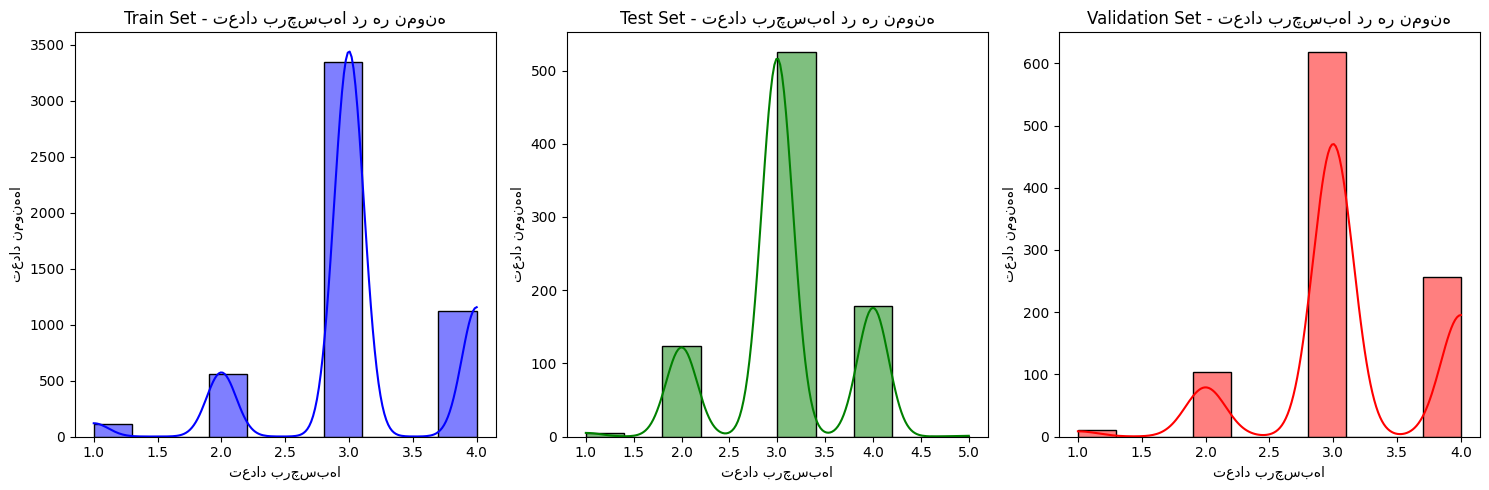

In [ ]:
# رسم هیستوگرام تعداد برچسب‌ها در هر نمونه برای هر مجموعه داده
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.histplot(train_label_counts, bins=10, kde=True, color='blue')
plt.title("Train Set - تعداد برچسب‌ها در هر نمونه")
plt.xlabel("تعداد برچسب‌ها")
plt.ylabel("تعداد نمونه‌ها")

plt.subplot(1, 3, 2)
sns.histplot(test_label_counts, bins=10, kde=True, color='green')
plt.title("Test Set - تعداد برچسب‌ها در هر نمونه")
plt.xlabel("تعداد برچسب‌ها")
plt.ylabel("تعداد نمونه‌ها")

plt.subplot(1, 3, 3)
sns.histplot(valid_label_counts, bins=10, kde=True, color='red')
plt.title("Validation Set - تعداد برچسب‌ها در هر نمونه")
plt.xlabel("تعداد برچسب‌ها")
plt.ylabel("تعداد نمونه‌ها")

plt.tight_layout()
plt.show()

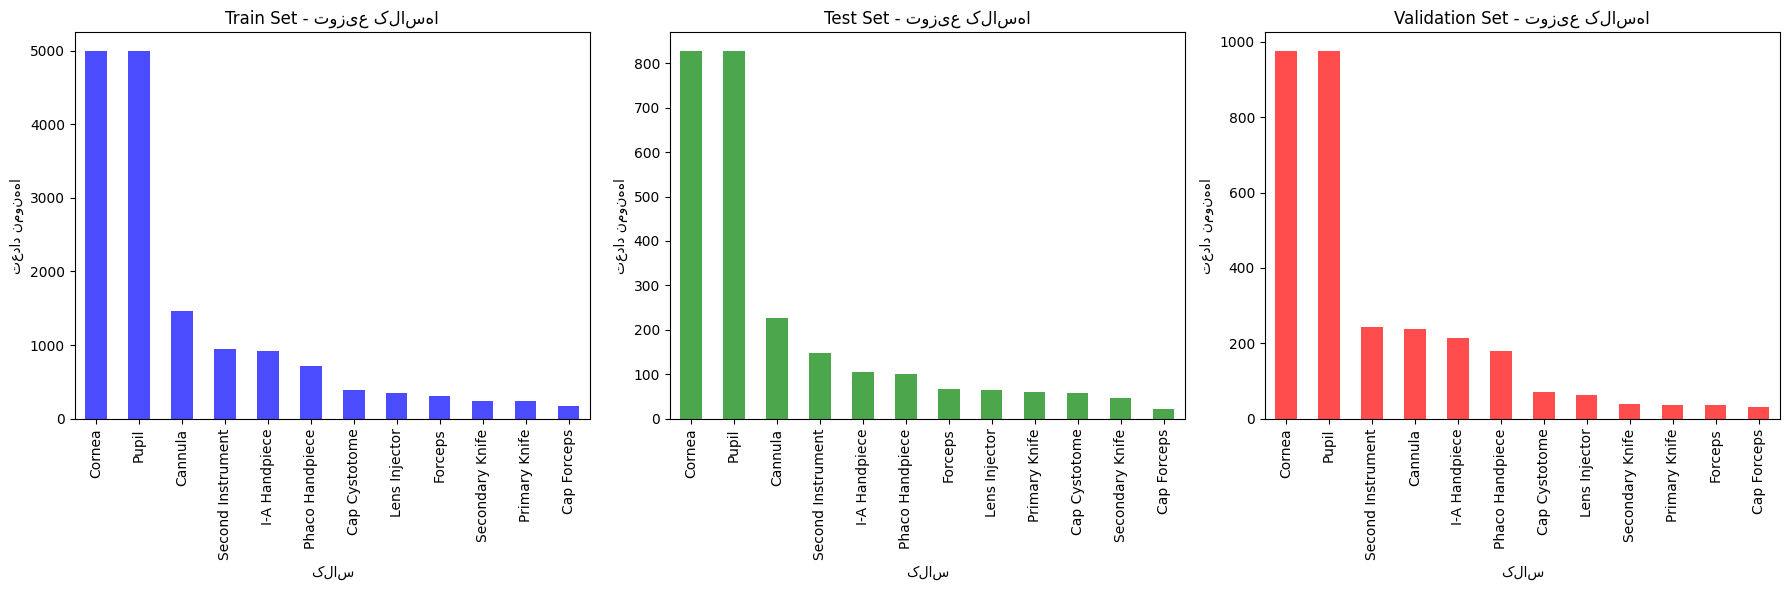

In [ ]:
# رسم نمودار میله‌ای برای توزیع کلاس‌ها در هر مجموعه
plt.figure(figsize=(18, 6))

plt.subplot(1, 3, 1)
train_class_distribution.plot(kind="bar", color="blue", alpha=0.7)
plt.title("Train Set - توزیع کلاس‌ها")
plt.xlabel("کلاس")
plt.ylabel("تعداد نمونه‌ها")
plt.xticks(rotation=90)

plt.subplot(1, 3, 2)
test_class_distribution.plot(kind="bar", color="green", alpha=0.7)
plt.title("Test Set - توزیع کلاس‌ها")
plt.xlabel("کلاس")
plt.ylabel("تعداد نمونه‌ها")
plt.xticks(rotation=90)

plt.subplot(1, 3, 3)
valid_class_distribution.plot(kind="bar", color="red", alpha=0.7)
plt.title("Validation Set - توزیع کلاس‌ها")
plt.xlabel("کلاس")
plt.ylabel("تعداد نمونه‌ها")
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()


In [20]:
import tensorflow as tf
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import Dense, Flatten, Dropout, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [37]:
# تنظیمات اولیه
IMG_SIZE = (224, 224)
BATCH_SIZE = 32
EPOCHS = 15
DATASET_PATH = "/content/dataset"  # مسیر پوشه‌ی شامل train، test، valid

In [18]:
num_classes = len(class_columns)


In [40]:
from sklearn.utils.class_weight import compute_class_weight
import numpy as np
# محاسبه وزن کلاس‌ها برای استفاده در Loss Function
y = train_df[class_columns].values.flatten()
class_weights = compute_class_weight(class_weight='balanced', classes=np.unique(y), y=y)
class_weights_dict = {i: class_weights[i] for i in range(len(class_weights))}

In [58]:
# پردازش تصاویر با ImageDataGenerator همراه با Data Augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.3,
    height_shift_range=0.3,
    shear_range=0.3,
    zoom_range=0.3,
    horizontal_flip=True,
    vertical_flip=True,  # افزودن Flip عمودی
    fill_mode='nearest'
)

test_datagen = ImageDataGenerator(rescale=1./255)

# آماده‌سازی داده‌های آموزش و اعتبارسنجی
train_generator = train_datagen.flow_from_dataframe(
    dataframe=train_df,
    directory=os.path.join(DATASET_PATH, 'train'),
    x_col='filename',
    y_col=class_columns,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='raw'
)

valid_generator = test_datagen.flow_from_dataframe(
    dataframe=valid_df,
    directory=os.path.join(DATASET_PATH, 'valid'),
    x_col='filename',
    y_col=class_columns,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='raw'
)
# آماده‌سازی داده‌های آزمون
test_generator = test_datagen.flow_from_dataframe(
    dataframe=test_df,
    directory=os.path.join(DATASET_PATH, 'test'),
    x_col='filename',
    y_col=class_columns,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='raw',
    shuffle=False
)


Found 5136 validated image filenames.
Found 991 validated image filenames.
Found 835 validated image filenames.


In [59]:
# بارگذاری مدل ResNet50 از پیش آموزش‌دیده‌شده
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
for layer in base_model.layers:
    layer.trainable = False

In [60]:
# اضافه کردن لایه‌های سفارشی
x = GlobalAveragePooling2D()(base_model.output)
x = Dense(512, activation='relu', kernel_regularizer=l2(0.02))(x)  # افزایش Regularization
x = Dropout(0.6)(x)  # افزایش Dropout
output_layer = Dense(num_classes, activation='sigmoid')(x)

In [61]:
# ایجاد مدل نهایی
model = Model(inputs=base_model.input, outputs=output_layer)

In [47]:
# استفاده از Focal Loss به جای Binary Crossentropy
def focal_loss(alpha=0.25, gamma=2.0):
    def focal_loss_fixed(y_true, y_pred):
        epsilon = tf.keras.backend.epsilon()
        y_pred = tf.keras.backend.clip(y_pred, epsilon, 1.0 - epsilon)
        cross_entropy = -y_true * tf.keras.backend.log(y_pred)
        weight = alpha * tf.keras.backend.pow((1 - y_pred), gamma)
        loss = weight * cross_entropy
        return tf.keras.backend.mean(loss)
    return focal_loss_fixed

In [62]:
# کامپایل مدل با تنظیمات جدید
model.compile(optimizer=Adam(learning_rate=0.0001),
              loss=focal_loss(),
              metrics=['accuracy'])

In [ ]:
# آموزش مدل
history = model.fit(
    train_generator,
    epochs=EPOCHS,
    validation_data=valid_generator,
    steps_per_epoch=len(train_generator),
    validation_steps=len(valid_generator),
    verbose=1,
    class_weight=class_weights_dict
)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/15
157/161 ━━━━━━━━━━━━━━━━━━━━ 1s 446ms/step - accuracy: 0.1405 - loss: 13.0844

In [51]:
# ارزیابی مدل
y_true = test_df[class_columns].values
y_pred = model.predict(test_generator)
y_pred = (y_pred > 0.5).astype(int)

27/27 ━━━━━━━━━━━━━━━━━━━━ 10s 256ms/step


In [53]:
# نمایش متریک‌های ارزیابی
print("Classification Report:")
print(classification_report(y_true, y_pred, target_names=class_columns))

Classification Report:
                   precision    recall  f1-score   support

          Cannula       0.27      1.00      0.43       226
    Cap Cystotome       0.07      1.00      0.13        59
      Cap Forceps       0.03      1.00      0.05        21
           Cornea       0.99      1.00      1.00       828
          Forceps       0.08      1.00      0.15        66
    I-A Handpiece       0.13      1.00      0.22       105
    Lens Injector       0.08      1.00      0.14        64
  Phaco Handpiece       0.12      1.00      0.21       100
    Primary Knife       0.07      1.00      0.13        60
            Pupil       0.99      1.00      1.00       827
Second Instrument       0.18      1.00      0.30       149
  Secondary Knife       0.06      1.00      0.11        47

        micro avg       0.25      1.00      0.41      2552
        macro avg       0.25      1.00      0.32      2552
     weighted avg       0.70      1.00      0.73      2552
      samples avg       0.25   

In [54]:
# نمایش ماتریس درهم‌ریختگی
conf_matrices = multilabel_confusion_matrix(y_true, y_pred)
for i, matrix in enumerate(conf_matrices):
    print(f"Confusion Matrix for {class_columns[i]}:")
    print(matrix)

Confusion Matrix for Cannula:
[[  0 609]
 [  0 226]]
Confusion Matrix for Cap Cystotome:
[[  0 776]
 [  0  59]]
Confusion Matrix for Cap Forceps:
[[  0 814]
 [  0  21]]
Confusion Matrix for Cornea:
[[  0   7]
 [  0 828]]
Confusion Matrix for Forceps:
[[  0 769]
 [  0  66]]
Confusion Matrix for I-A Handpiece:
[[  0 730]
 [  0 105]]
Confusion Matrix for Lens Injector:
[[  0 771]
 [  0  64]]
Confusion Matrix for Phaco Handpiece:
[[  0 735]
 [  0 100]]
Confusion Matrix for Primary Knife:
[[  0 775]
 [  0  60]]
Confusion Matrix for Pupil:
[[  0   8]
 [  0 827]]
Confusion Matrix for Second Instrument:
[[  0 686]
 [  0 149]]
Confusion Matrix for Secondary Knife:
[[  0 788]
 [  0  47]]


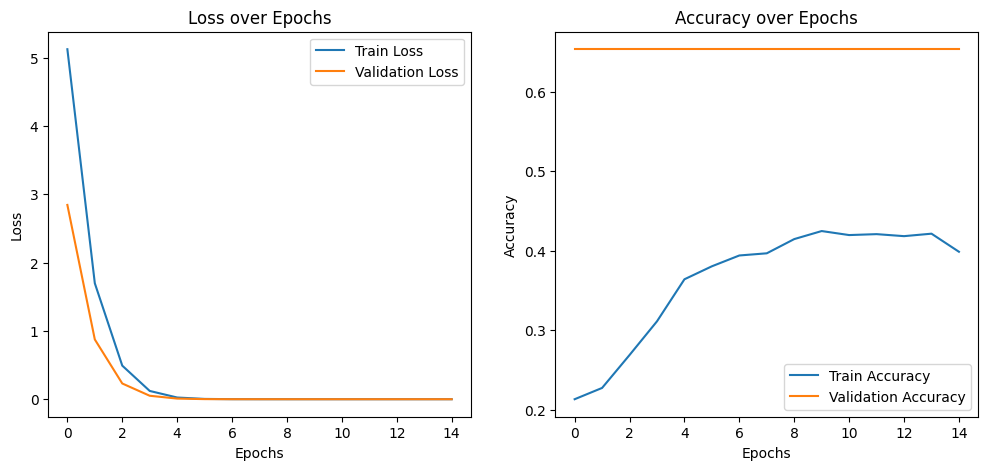

In [55]:
# رسم نمودارهای Loss و Accuracy
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss over Epochs')

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy over Epochs')

plt.show()